# Proyek Analisis Data: Bike sharing

List Nama Kelompok


-(211402061) Muhammad Isyammuddin

-(221402010) Jelly Ulita Tamsar

-(22140202105) Patricia Marbun



# Menentukan Pertanyaan Bisnis

- Pada tahun berapakah sepeda paling banyak disewa?
- Musim apa yang memiliki penyewa sepada tertinggi atau terbanyak?
- Bagaimana pola penggunaan penyewa sepeda casual dan terdaftar dalam menyewa sepeda berdasarkan waktu?

# Import semua Packages/Library yang Digunakan




In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

ModuleNotFoundError: No module named 'numpy'

# Gathering Data

In [2]:
days_df = pd.read_csv("data/day.csv")

In [3]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df = pd.read_csv("data/hour.csv")

In [5]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assesing Data

In [6]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah Duplikasi Data: ", days_df.duplicated().sum())

Jumlah Duplikasi Data:  0


Dapat dilihat jumlah duplikasi data pada tabel adalah 0


In [8]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dapat dilihat tidak ada missing value

In [9]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Info dari dataframe [hours_df]

In [10]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Duplikasi data

In [11]:
print("Jumlah duplikasi data: ", hours_df.duplicated().sum())

Jumlah duplikasi data:  0


Dapat dilihat jumlah duplikasi data pada dataframe adalah 0


In [1]:
hours_df.isna().sum()

NameError: name 'hours_df' is not defined

Dapat dilihat tidak ada missing value

In [13]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Identifikasi berbagai masalah pada data yang telah dikumpulkan. Berikut merupakan rangkumannya. <br>

|             | Tipe Data   |
| ----------- | ----------- |
| **days_df**  | Terdapat kesalahan tipe data untuk kolom `dteday`.|
| **hours_df** | Terdapat kesalahan tipe data untuk kolom `dteday`.|

# Cleaning Data

## Memperbaiki tipe data `dteday` pada dataframe [days_df]

In [9]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

NameError: name 'pd' is not defined

In [15]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dapat dilihat tipe data dteday sekarang sudah menjadi datetime bukan object

## Menormalisasi kembali kolom `temp`, `atemp`, `hum`, dan `windspeed`

In [16]:
days_df['temp'] = days_df['temp'] * 41
days_df['atemp'] = days_df['atemp'] * 50
days_df['hum'] = days_df['hum'] * 100
days_df['windspeed'] = days_df['windspeed'] * 67

In [17]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Memperbaiki value `season`, `weekday`, `mnth`, dan `yr`

In [18]:
def find_season(season):
    season_string = {1: 'Winter', 2: 'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in days_df['season']:
    season = find_season(season)
    season_list.append(season)

days_df['season'] = season_list

In [19]:
days_df['weekday'] = days_df['dteday'].dt.day_name()

In [20]:
days_df['mnth'] = days_df['dteday'].dt.month_name()

In [21]:
days_df['yr'] = days_df['dteday'].dt.year

In [22]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Memperbaiki tipe data `dteday` pada dataframe [hours_df]

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

NameError: name 'pd' is not defined

In [24]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat tipe data `dteday` sekarang sudah menjadi datetime bukan object

## Menormalisasi kembali kolom `temp`, `atemp`, `hue`, `windspeed`

In [12]:
hours_df['temp'] = hours_df['temp'] * 41
hours_df['atemp'] = hours_df['atemp'] * 50
hours_df['hum'] = hours_df['hum'] * 100
hours_df['windspeed'] = hours_df['windspeed'] * 67

NameError: name 'hours_df' is not defined

In [26]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


## Memperbaiki value `season`, `weekday`, `mnth`, dan `yr`

In [27]:
def find_season(season):
    season_string = {1: 'Winter', 2: 'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hours_df['season']:
    season = find_season(season)
    season_list.append(season)

hours_df['season'] = season_list

In [28]:
hours_df['weekday'] = hours_df['dteday'].dt.day_name()

In [29]:
hours_df['mnth'] = hours_df['dteday'].dt.month_name()

In [30]:
hours_df['yr'] = hours_df['dteday'].dt.year

In [31]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [32]:
hours_df.to_csv("clean_bikesharing-hour-dataset.csv", index=False)

# Exploratory Data Analysis (EDA)

## Explore

In [33]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,July,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [34]:
season_counts_cnt = hours_df.groupby(by="season")["cnt"].sum()
season_counts_cnt_sorted = season_counts_cnt.sort_values(ascending=False)

print(season_counts_cnt_sorted)

season
Summer    1061129
Spring     918589
Fall       841613
Winter     471348
Name: cnt, dtype: int64


Total seluruh penyewa sepeda terjadi pada musim panas dan yang paling sedikit terjadi pada musim dingin

In [35]:
season_counts_casual = hours_df.groupby(by="season")["casual"].sum()
season_counts_casual_sorted = season_counts_casual.sort_values(ascending=False)

print(season_counts_casual_sorted)

season
Summer    226091
Spring    203522
Fall      129782
Winter     60622
Name: casual, dtype: int64


Total seluruh penyewa sepeda casual terjadi pada musim panas dan yang paling sedikit terjadi pada musim dingin

In [36]:
season_counts_registered = hours_df.groupby(by="season")["registered"].sum()
season_counts_registered_sorted = season_counts_registered.sort_values(ascending=False)

print(season_counts_registered_sorted)

season
Summer    835038
Spring    715067
Fall      711831
Winter    410726
Name: registered, dtype: int64


Total seluruh penyewa terdaftar sepeda terjadi pada musim panas dan yang paling sedikit terjadi pada musim dingin

In [37]:
year_counts_cnt = hours_df.groupby(by="yr")["cnt"].sum()
year_counts_cnt_sorted = year_counts_cnt.sort_values(ascending=False)

print(year_counts_cnt_sorted)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64


Total seluruh penyewa sepeda terjadi pada tahun 2012

In [38]:
month_counts_cnt = hours_df.groupby(by="mnth")["cnt"].sum()
month_counts_cnt_sorted = month_counts_cnt.sort_values(ascending=False)

print(month_counts_cnt_sorted)

mnth
August       351194
June         346342
September    345991
July         344948
May          331686
October      322352
April        269094
November     254831
March        228920
December     211036
February     151352
January      134933
Name: cnt, dtype: int64


Dapat dilihat total seluruh penyewa sepeda terjadi pada bulan agustus dan yang paling sedikit terjadi pada bulan januari

In [39]:
weekday_counts_cnt = hours_df.groupby(by="weekday")["cnt"].sum()
weekday_counts_cnt_sorted = weekday_counts_cnt.sort_values(ascending=False)

print(weekday_counts_cnt_sorted)

weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


Dapat dlihat total seluruh penyewa sepeda terjadi minggu pada hari jumat dan yang paling sedikit terjadi pada hari minggu 

### Melihat parameter statistik pada setiap baris berdasarkan musim, tahun, bulan, dan hari dalam seminggu

In [3]:
hours_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

NameError: name 'hours_df' is not defined

In [41]:
hours_df.groupby(by="season").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

instant registered                            
       nunique        max min        mean         std
season                                               
Fall      4232        876   0  168.202032  157.559340
Spring    4409        782   0  162.183488  152.751493
Summer    4496        886   0  185.729093  166.430156
Winter    4242        681   0   96.823668  104.347605

In [42]:
hours_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
       nunique  max min        mean         std
season                                         
Fall      4232  967   1  198.868856  182.967972
Spring    4409  957   1  208.344069  188.362473
Summer    4496  977   1  236.016237  197.711630
Winter    4242  801   1  111.114569  119.224010

In [43]:
hours_df.groupby(by="yr").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

instant casual                          
     nunique    max min       mean        std
yr                                           
2011    8645    272   0  28.600578  38.840789
2012    8734    367   0  42.679757  56.970413

In [44]:
hours_df.groupby(by="yr").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

instant registered                            
     nunique        max min        mean         std
yr                                                 
2011    8645        567   0  115.193869  109.461014
2012    8734        886   0  191.986604  175.481637

In [45]:
hours_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
     nunique  max min        mean         std
yr                                           
2011    8645  651   1  143.794448  133.797854
2012    8734  977   1  234.666361  208.910941

In [46]:
hours_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

instant casual                          
          nunique    max min       mean        std
mnth                                              
April        1437    355   0  42.311761  58.621658
August       1475    289   0  48.840000  47.229486
December     1483    167   0  14.627782  20.300784
February     1341    229   0  11.158091  18.767280
January      1429    156   0   8.426872  15.151606
July         1488    269   0  52.524866  50.278385
June         1440    297   0  51.323611  54.415890
March        1473    367   0  30.172437  46.148230
May          1488    361   0  50.594758  59.095426
November     1437    304   0  25.471816  38.800505
October      1451    362   0  41.185389  55.847805
September    1437    350   0  48.937370  59.827156

In [47]:
hours_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

instant registered                            
          nunique        max min        mean         std
mnth                                                    
April        1437        697   0  144.949200  144.793339
August       1475        811   0  189.257627  170.903295
December     1483        737   0  127.675657  130.321809
February     1341        567   0  101.706935  104.438705
January      1429        518   0   85.997901   91.807469
July         1488        790   1  179.295027  158.084166
June         1440        796   0  189.191667  161.927697
March        1473        693   0  125.238289  133.730325
May          1488        770   1  172.312500  153.165293
November     1437        709   0  151.863605  140.268250
October      1451        876   1  180.973122  171.304657
September    1437        886   0  191.835769  177.809699

In [48]:
hours_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
          nunique  max min        mean         std
mnth                                              
April        1437  822   1  187.260960  181.137902
August       1475  941   1  238.097627  200.444648
December     1483  759   1  142.303439  141.080674
February     1341  610   1  112.865026  112.486565
January      1429  559   1   94.424773   99.907146
July         1488  913   1  231.819892  187.483806
June         1440  900   1  240.515278  196.038950
March        1473  957   1  155.410726  163.543050
May          1488  873   1  222.907258  187.721497
November     1437  729   1  177.335421  158.973887
October      1451  963   1  222.158511  203.477057
September    1437  977   1  240.773138  214.609531

In [49]:
hours_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

instant casual                          
          nunique    max min       mean        std
weekday                                           
Friday       2487    264   0  31.458786  36.487534
Monday       2479    272   0  28.553449  35.097056
Saturday     2512    367   0  61.246815  77.020582
Sunday       2502    317   0  56.163469  68.090663
Thursday     2471    154   0  24.872521  27.768088
Tuesday      2453    178   0  23.580514  26.170895
Wednesday    2475    237   0  23.159192  27.790658

In [50]:
hours_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "registered": ["max", "min", "mean", "std"]
})

instant registered                            
          nunique        max min        mean         std
weekday                                                 
Friday       2487        757   0  164.677121  149.905977
Monday       2479        857   0  155.191206  159.517897
Saturday     2512        491   0  128.962978  108.600931
Sunday       2502        526   0  121.305356  105.972899
Thursday     2471        885   0  171.564144  169.327395
Tuesday      2453        871   0  167.658377  170.103245
Wednesday    2475        886   0  167.971313  172.344752

In [51]:
hours_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
          nunique  max min        mean         std
weekday                                           
Friday       2487  957   1  196.135907  174.076894
Monday       2479  968   1  183.744655  179.514167
Saturday     2512  783   1  190.209793  179.820569
Sunday       2502  776   1  177.468825  168.167710
Thursday     2471  976   1  196.436665  188.011923
Tuesday      2453  970   1  191.238891  187.820480
Wednesday    2475  977   1  191.130505  190.894464

### Melihat histogram dan boxplot untuk `temp`. `atemp`, `hum`, `windspeed`, `cnt` untuk melihat outlier dan distribusi data 

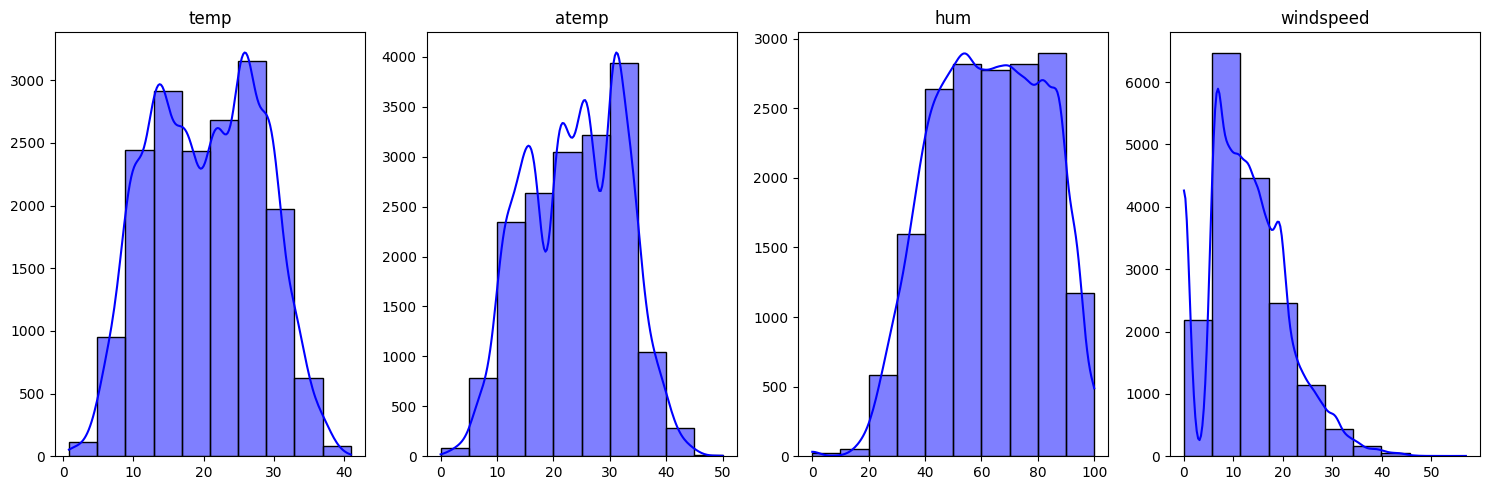

In [52]:
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
hours_df_float = hours_df[float_vars]

fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ax in enumerate(axs):
    sns.histplot(x=hours_df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='blue')
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
plt.tight_layout()
plt.show()

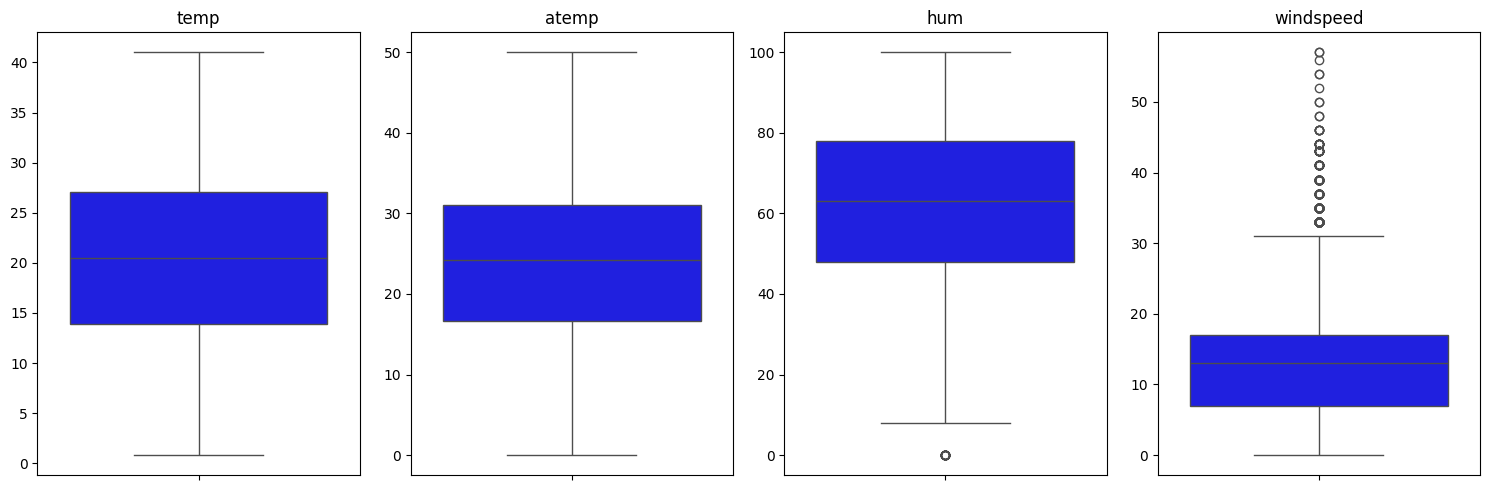

In [53]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, ax in enumerate(axs):
    sns.boxplot(y=hours_df_float[float_vars[i]], orient='v', ax=ax, color='blue')
    ax.set_title(float_vars[i])
    ax.set_ylabel("")
    
plt.tight_layout()

plt.show()

In [54]:
hours_df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


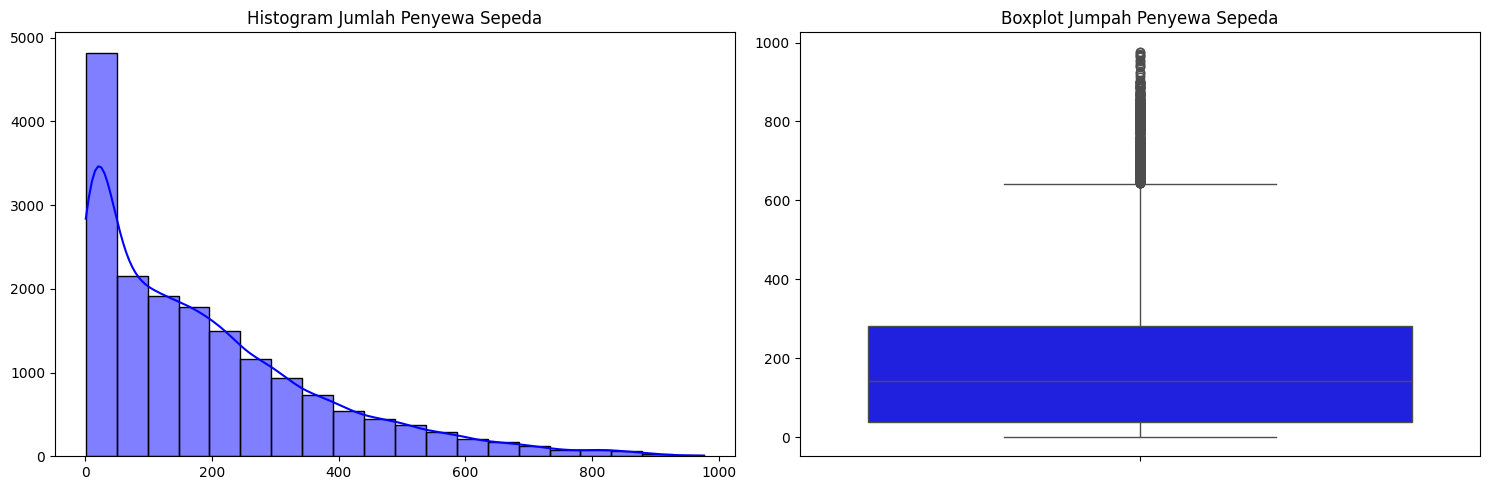

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(hours_df['cnt'], kde=True, bins=20, ax = axs[0], color='blue')
axs[0].set_title("Histogram Jumlah Penyewa Sepeda")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=hours_df['cnt'], ax = axs[1], color='blue')
axs[1].set_title("Boxplot Jumpah Penyewa Sepeda")
axs[1].set_xlabel("")
axs[1].set_ylabel("")

plt.tight_layout()

plt.show()

### Insight:
- Histogram untuk `temp`, `atemp`, dan `hum` menunjukkan distribusi normal (*normal distribution*), sedangkan untuk `windspeed` condong ke kanan (*right-skewed*).
- Boxplot untuk `temp`, `atemp`, dan `hum` tidak menunjukkan outlier, sedangkan untuk `windspeed` memiliki memiliki *outlier*.
- Histogram untuk `cnt` condong ke kanan (*right-skewed*) dan ternyata setelah diamati memiliki *outlier*.
- Meskipun ada outlier dalam variabel `windspeed`, kita melihat bahwa nilai maksimum 57 mph, dan itu bukan anomali dan mungkin terjadi dalam kehidupan nyata. Jadi kita tidak akan menghapus *outlier* dalam kasus ini.
- Mirip dengan `windspeed`, outlier pada `cnt`  tidak akan dihapus karena mungkin ada hari-hari dengan jumlah perjalanan yang sangat tinggi.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\936115619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Terdaftar", "Casual"], y=[registered_sum, casual_sum],  palette="Blues")


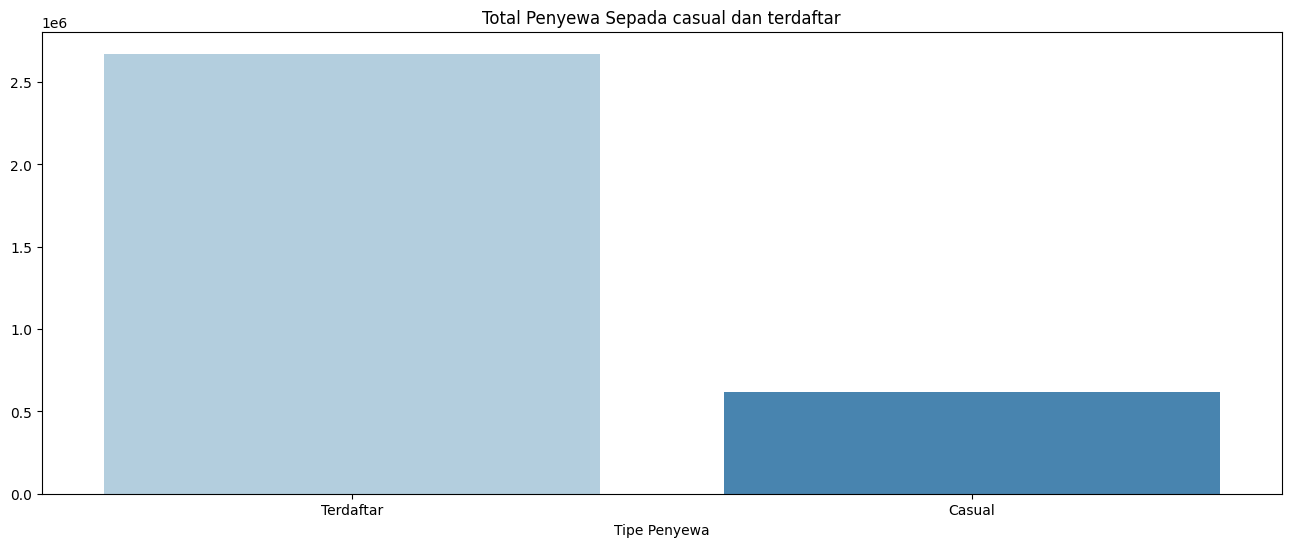

Jumlah Penyewa Sepeda Terdaftar: 2672662
Jumlah Penyewa Sepeda Casual: 620017


In [56]:
registered_sum = hours_df['registered'].sum()
casual_sum = hours_df['casual'].sum()

plt.figure(figsize=(16,6))

sns.barplot(x=["Terdaftar", "Casual"], y=[registered_sum, casual_sum],  palette="Blues")

plt.xlabel("Tipe Penyewa")
plt.ylabel("")
plt.title("Total Penyewa Sepada casual dan terdaftar")

plt.show()

print(f"Jumlah Penyewa Sepeda Terdaftar: {registered_sum}")
print(f"Jumlah Penyewa Sepeda Casual: {casual_sum}")

Dapat dilihat jumlah penyewa sepeda terdaftar lebih banyak dari jumlah penyewa sepeda casual

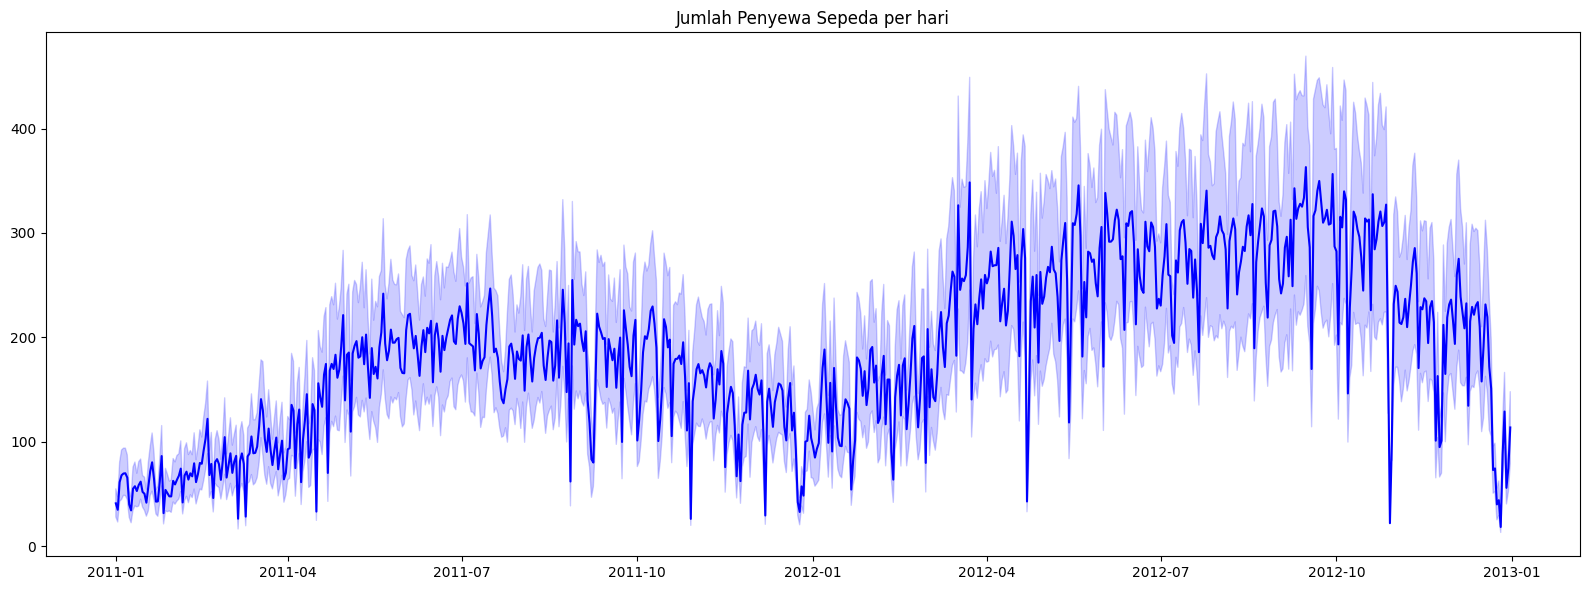

In [57]:
plt.figure(figsize=(16,6))

sns.lineplot(x="dteday", y="cnt", data=hours_df, color='blue')

plt.xlabel("")
plt.ylabel("")
plt.title("Jumlah Penyewa Sepeda per hari")

# Show the plot
plt.tight_layout()
plt.show()



- Dapat dilihat bahwa jumlah penyewa sepeda pada tahun 2012 lebih tinggi dibandingkan tahun 2011
- Jika dilihat grafik pertumbuhan penyewa sepeda dimulai dari awal tahun 2011, puncaknya terus mengalami kenaikan pada pertengahan tahun 2012, hingga pada akhirnya menurun kembali di akhir akhir tahun 2012

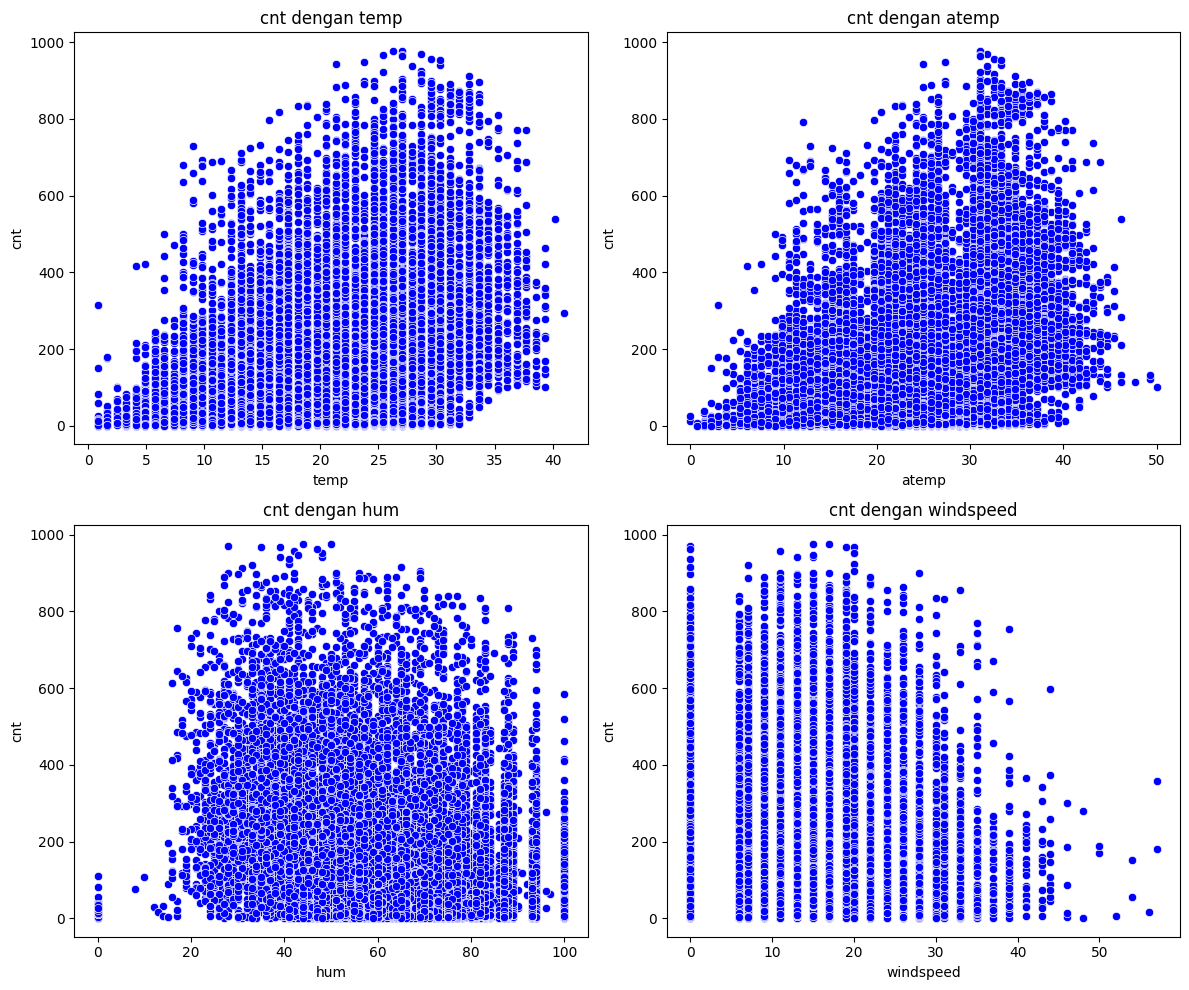

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x='temp', y='cnt', data=hours_df, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('cnt dengan temp')
axs[0, 0].set_xlabel('temp')

sns.scatterplot(x='atemp', y='cnt', data=hours_df, ax=axs[0, 1], color='blue')
axs[0, 1].set_title('cnt dengan atemp')
axs[0, 1].set_xlabel('atemp')

sns.scatterplot(x='hum', y='cnt', data=hours_df, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('cnt dengan hum')
axs[1, 0].set_xlabel('hum')

sns.scatterplot(x='windspeed', y='cnt', data=hours_df, ax=axs[1, 1], color='blue')
axs[1, 1].set_title('cnt dengan windspeed')
axs[1, 1].set_xlabel('windspeed')

for ax in axs.flat:
    ax.set_ylabel('cnt')

plt.tight_layout()

plt.show()

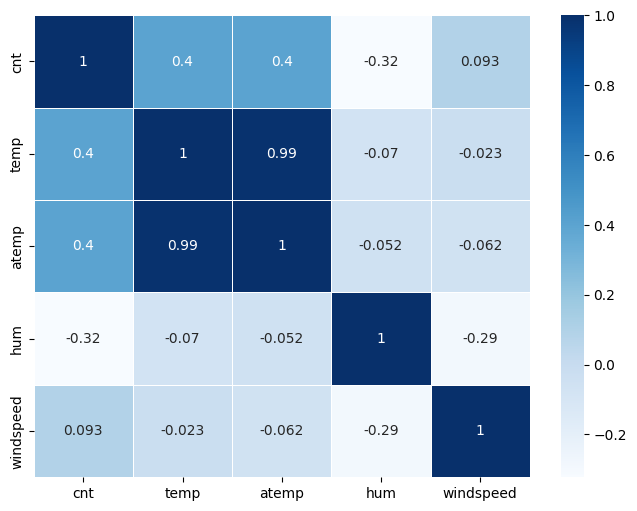

In [59]:
corr_matrix = hours_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)

plt.show()



- Scatterplot `temp` dengan `cnt` dan `atemp` dengan  `cnt` menunjukkan bahwa jumlah penyewa sepeda meningkat seiring dengan peningkatan suhu. Hal ini menunjukkan adanya korelasi antara `temp`, `atemp` dan jumlah penyewa sepeda.
- Scatterplot `hum` dengan `cnt` tidak menunjukkan korelasi.
- Scatterplot `windspeed` dengan `cnt` menunjukkan bahwa jumlah penyewa sepeda menurun seiring dengan peningkatan kecepatan angin.
- Heatmap menunjukkan bahwa `temp` dan `atemp` menujukkan adanya korelasi positif walaupun hanya 0.4
- Heatmap menujukkan bahwa `hum` menujukkan korelasi negatif dan `windspeed` hanya memiliki 0.093 (hampir 0) artinya tidak ada menunjukkan korelasi

# Visualization & Explanatory Analysis

## Pertanyaan 1: Pada tahun berapakah sepeda paling banyak disewa?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\3374299494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yr', y='cnt', data=yearly_users, palette="Blues")


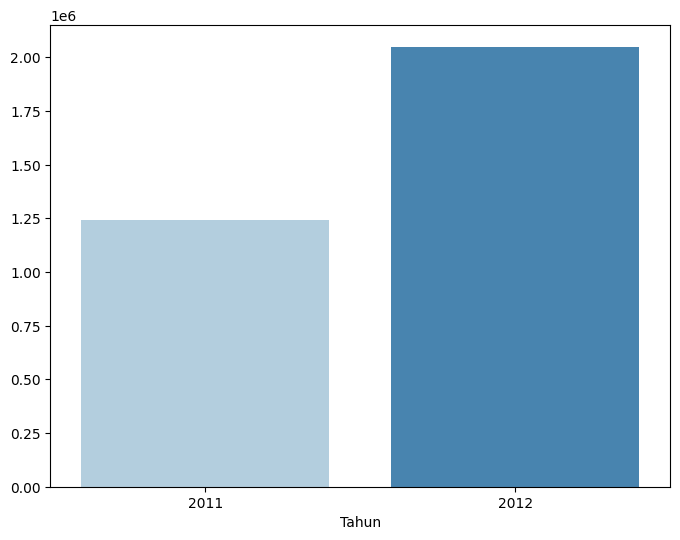

Tahun dengan penyewaan sepeda terbanyak: 2012, dengan total penyewaan: 2049576


In [61]:
yearly_users = hours_df.groupby('yr')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='yr', y='cnt', data=yearly_users, palette="Blues")

plt.xlabel("Tahun")
plt.ylabel("")

plt.show()

max_users_year = yearly_users.loc[yearly_users['cnt'].idxmax()]
print(f"Tahun dengan penyewaan sepeda terbanyak: {int(max_users_year['yr'])}, dengan total penyewaan: {int(max_users_year['cnt'])}")

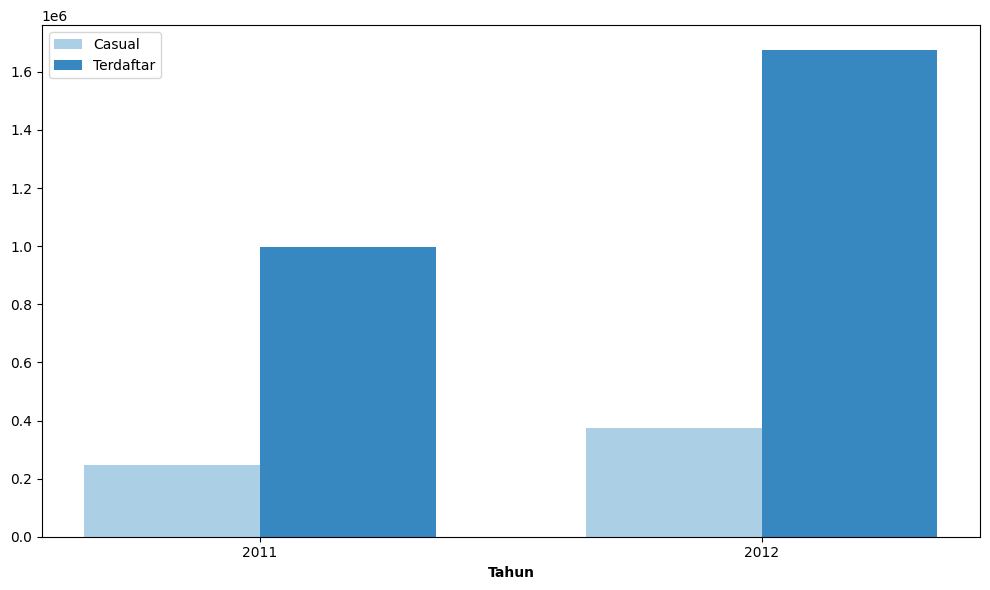

In [62]:
yearly_users = hours_df.groupby('yr')[['casual', 'registered']].sum().reset_index()

bar_width = 0.35

r1 = np.arange(len(yearly_users['yr']))
r2 = [x + bar_width for x in r1]

colors = sns.color_palette("Blues", 2)

plt.figure(figsize=(10, 6))

plt.bar(r1, yearly_users['casual'], color=colors[0], width=bar_width, label='Casual')
plt.bar(r2, yearly_users['registered'], color=colors[1], width=bar_width, label='Terdaftar')

plt.xlabel('Tahun', fontweight='bold')
plt.ylabel('')

plt.xticks([r + bar_width / 2 for r in range(len(yearly_users['yr']))], yearly_users['yr'])

plt.legend()

plt.tight_layout()
plt.show()



- Dapat dilihat bahwa baik pada penyewa sepeda terdaftar dan penyewa casual atau bahkan total dari keduanya menunjukkan tahun 2012 adalah tahun paling banyak sepeda disewakan

## Pertanyaan 2: Musim apa yang memiliki penyewa sepada tertinggi atau terbanyak?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24148\323427261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_users, palette="Blues")


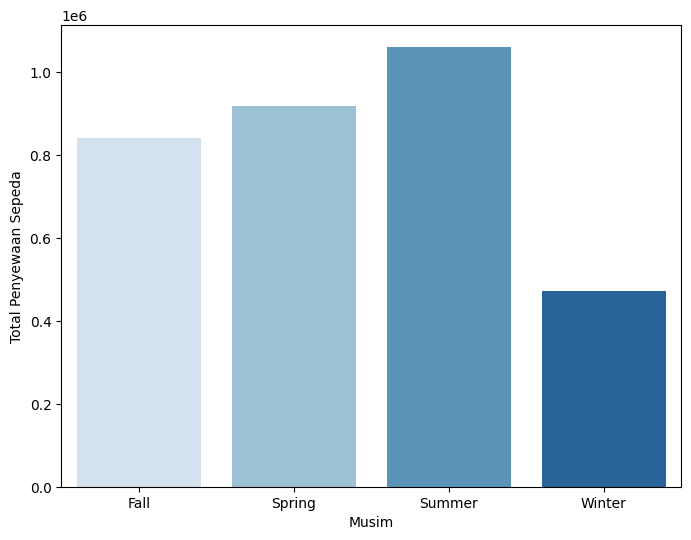

Musim dengan penyewaan sepeda terbanyak: Summer, dengan total penyewaan: 1061129


In [66]:
seasonal_users = hours_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=seasonal_users, palette="Blues")

plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")

plt.show()

max_users_season = seasonal_users.loc[seasonal_users['cnt'].idxmax()]
print(f"Musim dengan penyewaan sepeda terbanyak: {max_users_season['season']}, dengan total penyewaan: {int(max_users_season['cnt'])}")

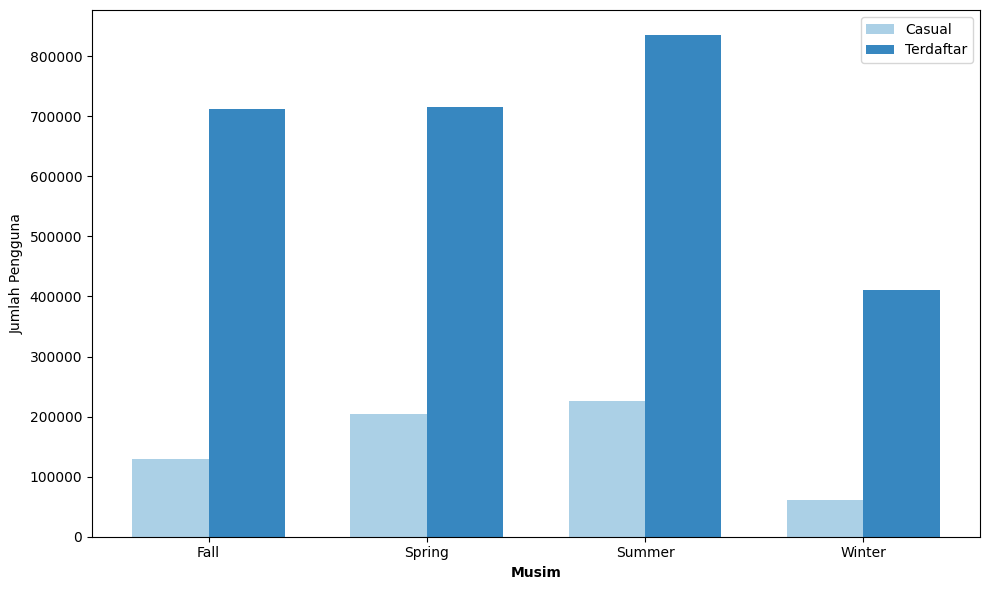

In [64]:
seasonal_users = hours_df.groupby('season')[['casual', 'registered']].sum().reset_index()

bar_width = 0.35

r1 = np.arange(len(seasonal_users['season']))
r2 = [x + bar_width for x in r1]

colors = sns.color_palette("Blues", 2)

plt.figure(figsize=(10, 6))

plt.bar(r1, seasonal_users['casual'], color=colors[0], width=bar_width, label='Casual')
plt.bar(r2, seasonal_users['registered'], color=colors[1], width=bar_width, label='Terdaftar')

plt.xlabel('Musim', fontweight='bold')
plt.ylabel('Jumlah Pengguna')

plt.xticks([r + bar_width / 2 for r in range(len(seasonal_users['season']))], seasonal_users['season'])

plt.legend()

plt.tight_layout()
plt.show()




- Jumlah penyewaan sepeda  paling banyak selama musim panas, dan paling sedikit selama musim dingin. Bahkan untuk penyewa sepeda casual dan terdaftar, keduanya tetap sama-sama paling banyak menyewa sepeda di musim panas, dan paling sedikit di musim dingin

## Pertanyaan 3: Bagaimana pola penggunaan penyewa sepeda casul dan terdaftar dalam menyewa sepeda berdasarkan waktu?

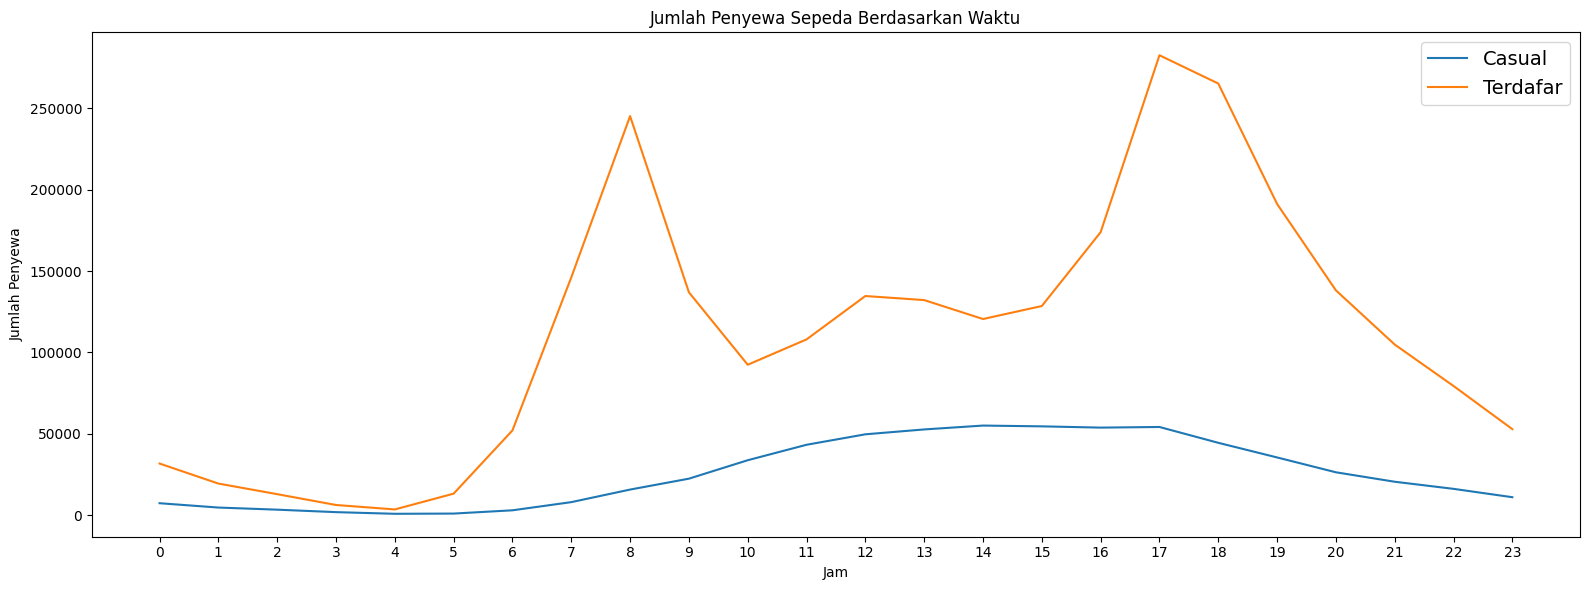

In [65]:
hourly_users_df = hours_df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
})

plt.figure(figsize=(16,6))

sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Terdafar')

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewa")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Waktu")

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()

plt.show()



- Bagan di atas menunjukkan pola yang sangat jelas berbeda tentang perbedaan antara penyewa sepeda casual dan penyewa sepeda terdaftar berdasarkan jam dalam sehari.
- Penyewa sepeda terdaftar menunjukkan puncaknya pada pukul 8.00 dan 17.00. Mengingat kedua jam tersebut adalah waktu orang berangkat kerja dan pulang kerja, ada kemungkinan penyewa sepeda  terdaftar menggunakan sepeda untuk pergi bekerja dan pulang bekerja.
- Di sisi lain, penyewa sepeda casual menunjukkan frekuensi yang lebih tinggi pada siang hari, kemudian mulai menurun setelah pukul 17.00.